# 의사결정나무

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc("font", family= 'Noto Sans CJK JP')

from sklearn.tree import export_graphviz

import graphviz

from subprocess import call
from IPython.display import Image

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix,classification_report


In [2]:
df_raw=pd.read_csv("/home/piai/바탕화면/2. Big Data 분석/유방암.csv", encoding='euc-kr')
df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                320 non-null    object 
 1   mean_radius              320 non-null    float64
 2   mean_texture             320 non-null    float64
 3   mean_perimeter           320 non-null    float64
 4   mean_area                320 non-null    float64
 5   mean_smoothness          320 non-null    float64
 6   mean_compactness         320 non-null    float64
 7   mean_concavity           320 non-null    float64
 8   mean_concave_points      320 non-null    float64
 9   mean_symmetry            320 non-null    float64
 10  mean_fractal_dimension   320 non-null    float64
 11  radius_error             320 non-null    float64
 12  texture_error            320 non-null    float64
 13  perimeter_error          320 non-null    float64
 14  area_error               3

In [4]:
df_raw.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
count,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,...,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000
mean,15.709703,20.323250,103.050469,807.735937,0.099358,0.123252,0.122144,0.066977,0.186772,0.062679,...,18.542406,27.225594,123.221625,1133.463438,0.137678,0.308713,0.352927,0.145487,0.305097,0.087156
std,3.745788,4.150729,25.835984,391.969297,0.014249,0.057207,0.084822,0.041732,0.027485,0.007190,...,5.182210,6.050052,35.960154,640.979627,0.023316,0.175225,0.214449,0.067292,0.069367,0.020076
min,7.691000,9.710000,47.920000,170.400000,0.052630,0.026750,0.000000,0.000000,0.127400,0.049960,...,8.678000,12.020000,54.490000,223.600000,0.085670,0.050360,0.000000,0.000000,0.156500,0.055040
25%,13.050000,17.460000,84.845000,523.900000,0.090240,0.081132,0.052770,0.029538,0.166900,0.057450,...,14.657500,23.275000,95.525000,653.525000,0.122675,0.180275,0.182950,0.090868,0.258700,0.073475
50%,15.125000,20.215000,100.100000,713.050000,0.098570,0.115300,0.110850,0.065265,0.184650,0.061445,...,17.730000,26.880000,118.850000,969.200000,0.138050,0.276950,0.339750,0.152700,0.295800,0.082640
75%,18.520000,22.500000,121.550000,1075.250000,0.108050,0.155650,0.169550,0.091777,0.202700,0.066705,...,22.420000,30.937500,148.850000,1538.500000,0.151200,0.405675,0.483675,0.197100,0.328125,0.097745
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.170000,0.291000,0.663800,0.207500


In [5]:
df_raw.isnull().sum()

diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
dtype: int64

In [6]:
df_raw_x=df_raw.drop("diagnosis", axis=1, inplace=False)

In [7]:
df_raw_y=df_raw["diagnosis"]

In [8]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x,df_raw_y,test_size=0.4, random_state=6659)

In [9]:
print("분할 전 설명변수 데이터:", df_raw_x.shape)
print("분할 후 설명변수 데이터: Train", df_train_x.shape, " Test", df_test_x.shape)

분할 전 설명변수 데이터: (320, 30)
분할 후 설명변수 데이터: Train (192, 30)  Test (128, 30)


## 데이터를 불러와서 기술통계량과 type과 행과열 개수를 확인해주었습니다. 그 다음 df_raw 데이터를 x,y로 불리한 후 6:4의 training 데이터와 test 데이터로 나누어주었습니다. 분할 전에는 320,30 이지만 6:4로 나눠져서 192.30, 128,30이 된 것을 알 수 있습니다.

## 데이터 결측치를 확인해주었지만 결측치는 존재하지않았고, training으로 사용될 데이터가 smote 기법을 사용하더라도 매우 작은 관계로 이상치 제거는 해주지 않았습니다.

In [10]:
from imblearn.over_sampling import SMOTE

print(df_raw.value_counts(["diagnosis"]),"\n")
print("diagnosis=1 비율", df_raw.value_counts(df_raw["diagnosis"]==1)/len(df_raw))

plt.figure(figsize=(10,8))
df_raw['color']=np.where(df_raw["diagnosis"]==1, "red","blue")



diagnosis
음성           212
양성           108
dtype: int64 

diagnosis=1 비율 diagnosis
False    1.0
dtype: float64


<Figure size 1000x800 with 0 Axes>

In [11]:
sm=SMOTE(sampling_strategy='auto')

x_resampled, y_resampled =sm.fit_resample(df_train_x, df_train_y)

print('Over-Sampling 전:\n', df_train_y.value_counts(),"\n")
print('Over-Sampling 후 Train X:{}'.format(x_resampled.shape))
print('Over-Sampling 후 Train Y:{}\n'.format(y_resampled.shape))
print("Over-Sampling 후 '1':{}".format(sum(y_resampled==1)))
print("Over-Sampling 후 '0':{}".format(sum(y_resampled==0)))


Over-Sampling 전:
 음성    132
양성     60
Name: diagnosis, dtype: int64 

Over-Sampling 후 Train X:(264, 30)
Over-Sampling 후 Train Y:(264,)

Over-Sampling 후 '1':0
Over-Sampling 후 '0':0


In [12]:
y_resampled.value_counts()

음성    132
양성    132
Name: diagnosis, dtype: int64

## 양성과 음성에 대한 목표변수의 데이터가 불균형을 이루고 있습니다. 이럴 경우는 과적합이 발생하기 때문에 이를 막고자 smote기법을 사용하여 비교적 부족한 양성 데이터를 늘려서 50:50으로 데이터 균형을 맞추어 주었습니다. 최초 132:60이지만 value_count()로 데이터가 132:132 가 된 것을 알 수 있습니다.

In [13]:
tree_uncust=DecisionTreeClassifier(random_state=6659)
tree_uncust.fit(x_resampled,y_resampled)

print("Accuracy on training set: {:.3f}".format(tree_uncust.score(x_resampled,y_resampled)))
print("Accuracy on test set: {:.3f}".format(tree_uncust.score(df_test_x,df_test_y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.914


In [14]:
print(tree_uncust.get_params().keys())
print(tree_uncust.get_params().values())

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])
dict_values([0.0, None, 'gini', None, None, None, 0.0, 1, 2, 0.0, 6659, 'best'])


## 파라미터값은 정하지 않고, 난수 6659만 부여하고, 모델을 구축해보았습니다.

In [15]:
train_accuracy=[]; test_accuracy=[]
para_depth=[depth for depth in range(3,13)]

for v_max_depth in para_depth :
    tree= DecisionTreeClassifier(max_depth=v_max_depth, random_state=6659)
    tree.fit(x_resampled, y_resampled)
    train_accuracy.append(tree.score(x_resampled,y_resampled))
    test_accuracy.append(tree.score(df_test_x,df_test_y))

In [16]:
df_accuracy_depth= pd.DataFrame()
df_accuracy_depth["Depth"]=para_depth
df_accuracy_depth["TrainScore"]= train_accuracy
df_accuracy_depth["TestScore"]=test_accuracy
df_accuracy_depth.round(3)

,Depth,TrainScore,TestScore
0,3,0.981,0.922
1,4,0.996,0.914
2,5,0.996,0.914
3,6,1.000,0.914
4,7,1.000,0.914
5,8,1.000,0.914
6,9,1.000,0.914
7,10,1.000,0.914
8,11,1.000,0.914
9,12,1.000,0.914


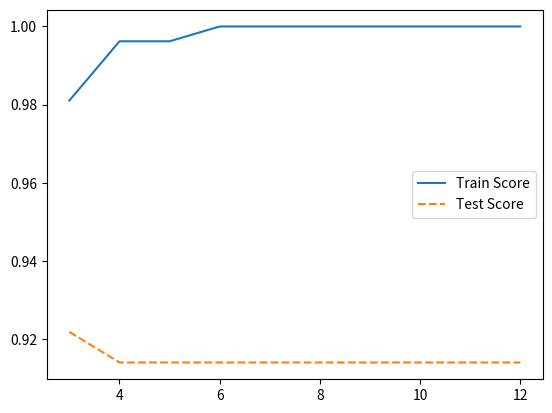

In [17]:
plt.plot(para_depth, train_accuracy, linestyle="-", label="Train Score")
plt.plot(para_depth, test_accuracy, linestyle="--", label="Test Score")
plt.legend()

## 의사결정나무에서 최적 파라미터를 지정해주기 위해서 깊이 3부터 12까지 for문을 통하여 돌려주고, 시각화하여 확인하였습니다. 데이터의 수가 매우 적기때문에 깊이가 깊으면 과적합이 발생할 것이라고 생각하여서 깊이는 4를 지정해주었습니다.

In [18]:
train_accuracy=[]; test_accuracy=[]
para_split=[n_split*2 for n_split in range(2,15)]

for v_min_samples_split in para_split :
    tree= DecisionTreeClassifier(max_depth=4, min_samples_split=v_min_samples_split, random_state=6659)
    tree.fit(x_resampled, y_resampled)
    train_accuracy.append(tree.score(x_resampled, y_resampled))
    test_accuracy.append(tree.score(df_test_x,df_test_y))

In [19]:
df_accuracy_split= pd.DataFrame()
df_accuracy_split["MinSampleSplit"]=para_split
df_accuracy_split["TrainScore"]= train_accuracy
df_accuracy_split["TestScore"]=test_accuracy
df_accuracy_split.round(3)

,MinSampleSplit,TrainScore,TestScore
0,4,0.996,0.914
1,6,0.996,0.914
2,8,0.996,0.914
3,10,0.996,0.914
4,12,0.985,0.922
5,14,0.985,0.922
6,16,0.985,0.922
7,18,0.985,0.922
8,20,0.985,0.922
9,22,0.985,0.922


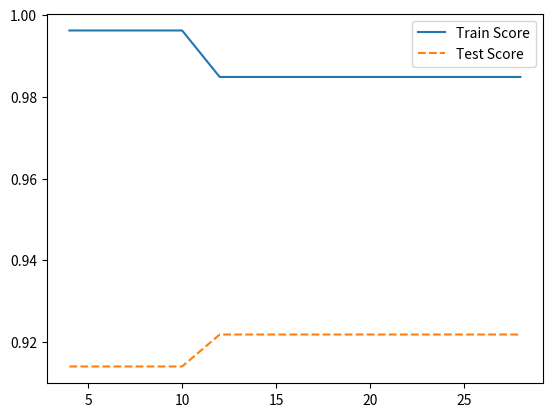

In [20]:
plt.plot(para_split, train_accuracy, linestyle="-", label="Train Score")
plt.plot(para_split, test_accuracy, linestyle="--", label="Test Score")
plt.legend()

## 의사결정나무의 min_samples_split에 최적 파라미터를 찾아주기 위해 이전에 했단 depth=4만 추가하여 4,6,8...28 까지 부여해서 돌려보았습니다. 이 또한 매우 큰 값은 과적합 위험이 있어서 test데이터가 안정되는 구간인 8을 선택하였습니다.

In [22]:
train_accuracy=[]; test_accuracy=[]
para_leaf=[n_leaf*2 for n_leaf in range(1,15)]

for v_min_samples_leaf in para_leaf :
    tree= DecisionTreeClassifier(min_samples_leaf = v_min_samples_leaf, max_depth=4, min_samples_split=8, random_state=6659)
    tree.fit(x_resampled, y_resampled)
    train_accuracy.append(tree.score(x_resampled, y_resampled))
    test_accuracy.append(tree.score(df_test_x,df_test_y))

In [23]:
df_accuracy_depth= pd.DataFrame()
df_accuracy_depth["MinSampleLeaf"]=para_leaf
df_accuracy_depth["TrainScore"]= train_accuracy
df_accuracy_depth["TestScore"]=test_accuracy
df_accuracy_depth.round(3)

,MinSampleLeaf,TrainScore,TestScore
0,2,0.992,0.914
1,4,0.985,0.945
2,6,0.981,0.930
3,8,0.966,0.930
4,10,0.958,0.930
5,12,0.951,0.930
6,14,0.943,0.930
7,16,0.936,0.906
8,18,0.936,0.906
9,20,0.936,0.906


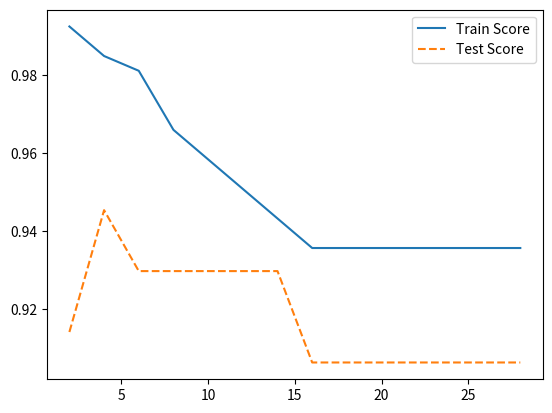

In [24]:
plt.plot(para_leaf, train_accuracy, linestyle="-", label="Train Score")
plt.plot(para_leaf, test_accuracy, linestyle="--", label="Test Score")
plt.legend()

## 의사결정나무의 최적 min_samples_leaf 를 찾아주기 위해 for문을 통해 2,4,6,8....28까지 값을 부여하고 시각화하여 확인해보았습니다. split보다 작은 값을 부여해야 하기때문에 5를 선정하였습니다.

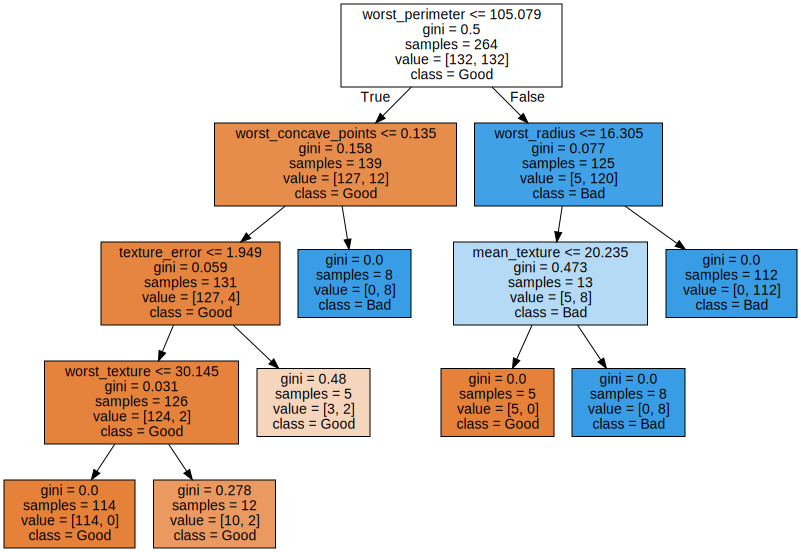

In [25]:
v_feature_name=x_resampled.columns
tree_final= DecisionTreeClassifier(max_depth=4, min_samples_split=8, min_samples_leaf=5,random_state=6659)
tree_final.fit(x_resampled, y_resampled)
export_graphviz(tree_final, out_file="tree_final.dot",class_names=["Good","Bad"], feature_names= v_feature_name, impurity=True, filled=True)

with open("tree_final.dot") as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))


## 최적 파라미터를 찾은 최종모델의 결정나무 전체 구조를 시각화하여 확인하였습니다. 최초에 데이터가 132:132 씩있고 최초 분기는  worst_perimeter가 105.079보다 작은지 큰지에 대해 class가 나누어지고, 거의 대부분의 데이터가 분리된 것을 알 수 있습니다. 

In [26]:
y_pred=tree_final.predict(df_test_x)
print("Accuracy:{0:.3f}\n".format(tree_final.score(df_test_x, df_test_y)))
print("Test Confusion Matrix:\n{}".format(confusion_matrix(df_test_y , y_pred)))

print(classification_report(df_test_y, y_pred, digits=3))

Accuracy:0.945

Test Confusion Matrix:
[[41  7]
 [ 0 80]]
              precision    recall  f1-score   support

          양성      1.000     0.854     0.921        48
          음성      0.920     1.000     0.958        80

    accuracy                          0.945       128
   macro avg      0.960     0.927     0.940       128
weighted avg      0.950     0.945     0.944       128



## 전체 데이터 128개 중 7개를 제외하고는 모두 선별하였습니다. 정확도는 94.5이고, 양성의 재현율은 0.854, 음성의 재현율 1, 정밀도는 양성이 1 음성이 0.92입니다. 조화평균 또한 매우 높습니다.

In [27]:
df_importance=pd.DataFrame()
df_importance["Feature"]= v_feature_name
df_importance["importance"]= tree_final.feature_importances_

In [28]:
df_importance.sort_values("importance",ascending=False, inplace= True)
df_importance.round(3)

,Feature,importance
22,worst_perimeter,0.796
27,worst_concave_points,0.112
1,mean_texture,0.049
20,worst_radius,0.027
11,texture_error,0.011
21,worst_texture,0.005
0,mean_radius,0.000
16,concavity_error,0.000
28,worst_symmetry,0.000
26,worst_concavity,0.000


Text(0, 0.5, '설명변수')

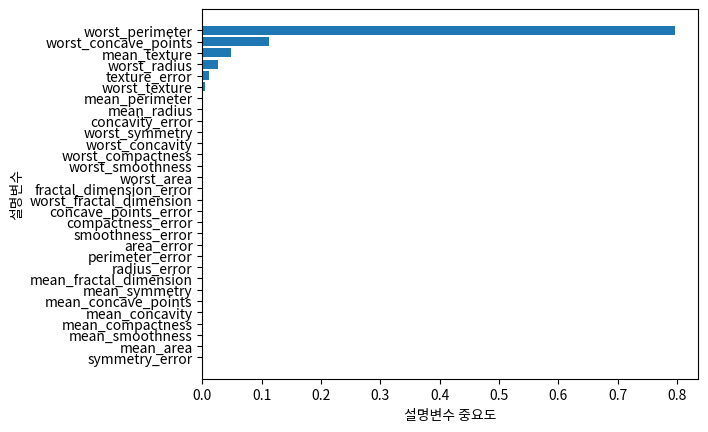

In [29]:
df_importance.sort_values("importance",ascending=True, inplace= True)
coordinates= range(len(df_importance))
plt.barh(y= coordinates, width= df_importance["importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

## 성능은 매우 좋았습니다. 하지만 변수 중요도를 보았을 때 하나의 변수만 결과를 너무 잘 설명하기에 좋은 모델이라고는 할 수 없습니다. 파라미터를 조절하면 조금씩 변수 중요도가 바뀌지만 확인 결과 worst_perimeter가 압도적인 설명력을 나타내고 있습니다.

In [30]:
# 의사결정나무 GridSearch를 통한 최적 파라미터 결정

In [34]:
estimator= DecisionTreeClassifier()
param_grid={"max_depth":para_depth,"min_samples_split":para_split, "min_samples_leaf":para_leaf}

grid_dt=GridSearchCV(estimator,param_grid,scoring="accuracy", n_jobs= -1)
grid_dt.fit(x_resampled, y_resampled)

print("best estimator model: \n{}".format(grid_dt.best_estimator_))
print("\nbest parameter:\n{}".format(grid_dt.best_params_))
print("\nbest score:\n{}".format(grid_dt.best_score_.round(3)))

best estimator model: 
DecisionTreeClassifier(max_depth=3, min_samples_leaf=6, min_samples_split=4)

best parameter:
{'max_depth': 3, 'min_samples_leaf': 6, 'min_samples_split': 4}

best score:
0.958


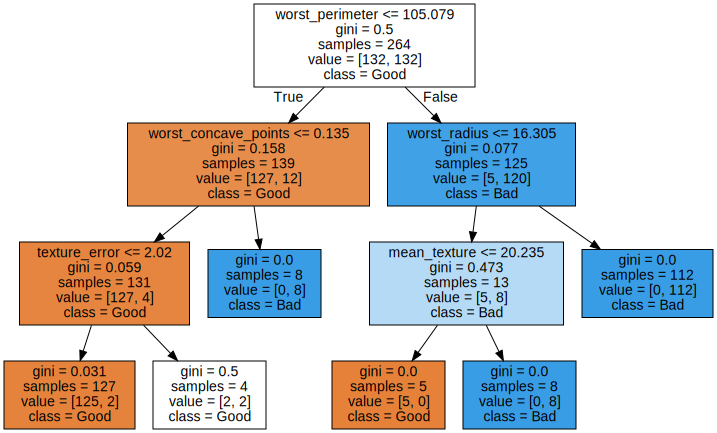

In [35]:
v_feature_name=x_resampled.columns
tree_final= DecisionTreeClassifier(max_depth=3, min_samples_split=6, min_samples_leaf=4,random_state=6659)
tree_final.fit(x_resampled, y_resampled)
export_graphviz(tree_final, out_file="tree_final.dot",class_names=["Good","Bad"], feature_names= v_feature_name, impurity=True, filled=True)

with open("tree_final.dot") as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))


In [36]:
y_pred=tree_final.predict(df_test_x)
print("Accuracy:{0:.3f}\n".format(tree_final.score(df_test_x, df_test_y)))
print("Test Confusion Matrix:\n{}".format(confusion_matrix(df_test_y , y_pred)))

print(classification_report(df_test_y, y_pred, digits=3))

Accuracy:0.945

Test Confusion Matrix:
[[41  7]
 [ 0 80]]
              precision    recall  f1-score   support

          양성      1.000     0.854     0.921        48
          음성      0.920     1.000     0.958        80

    accuracy                          0.945       128
   macro avg      0.960     0.927     0.940       128
weighted avg      0.950     0.945     0.944       128



## GridSearch를 돌리더라도 결과는 큰 차이가 없지만 GridSearch 자체의 문제가 있었습니다 leaf은 split 보다 많아질 수 없음에도 불과하고 최적 파라미터를  min_samples_leaf': 6, 'min_samples_split': 4 의 결과를 출력하였습니다. 현업이였다면 사용하지 않았겠지만 연습이기에 모델에 적용하여 돌려보았습니다.

In [37]:
df_importance=pd.DataFrame()
df_importance["Feature"]= v_feature_name
df_importance["importance"]= tree_final.feature_importances_

In [38]:
df_importance.sort_values("importance",ascending=False, inplace= True)
df_importance.round(3)

,Feature,importance
22,worst_perimeter,0.797
27,worst_concave_points,0.112
1,mean_texture,0.049
20,worst_radius,0.027
11,texture_error,0.014
0,mean_radius,0.000
16,concavity_error,0.000
28,worst_symmetry,0.000
26,worst_concavity,0.000
25,worst_compactness,0.000


Text(0, 0.5, '설명변수')

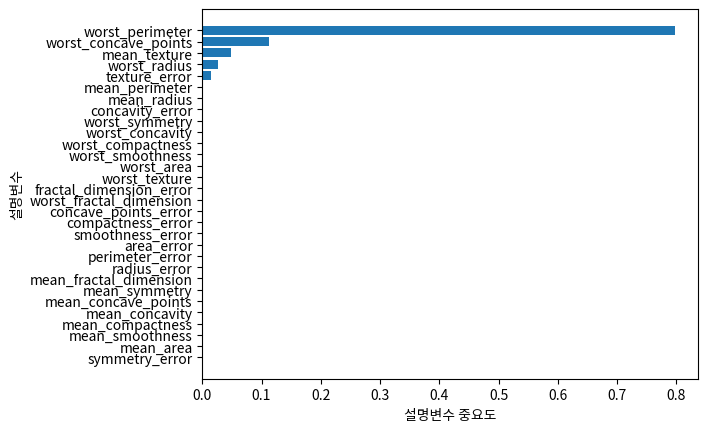

In [39]:
df_importance.sort_values("importance",ascending=True, inplace= True)
coordinates= range(len(df_importance))
plt.barh(y= coordinates, width= df_importance["importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

## GridSearch를 통해 돌리더라도 worst_perimeter 변수만 중요도가 압도적으로 높게 나오는 것을 알 수 있었습니다.

# 랜덤포레스트

In [40]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix,classification_report


In [41]:
df_raw=pd.read_csv("/home/piai/바탕화면/2. Big Data 분석/유방암.csv", encoding='euc-kr')
df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [42]:
df_raw_x=df_raw.drop("diagnosis", axis=1, inplace=False)

In [43]:
df_raw_y=df_raw["diagnosis"]

In [44]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x,df_raw_y,test_size=0.4, random_state=6659)

In [45]:
print("분할 전 설명변수 데이터:", df_raw_x.shape)
print("분할 후 설명변수 데이터: Train", df_train_x.shape, " Test", df_test_x.shape)

분할 전 설명변수 데이터: (320, 30)
분할 후 설명변수 데이터: Train (192, 30)  Test (128, 30)


## 데이터를 불러와서 기술통계량과 type과 행과열 개수를 확인해주었습니다. 그 다음 df_raw 데이터를 x,y로 불리한 후 6:4의 training 데이터와 test 데이터로 나누어주었습니다. 분할 전에는 320,30 이지만 6:4로 나눠져서 192.30, 128,30이 된 것을 알 수 있습니다.

## 데이터 결측치를 확인해주었지만 결측치는 존재하지않았고, training으로 사용될 데이터가 smote 기법을 사용하더라도 매우 작은 관계로 이상치 제거는 해주지 않았습니다. 앞에 의사결정나무와 동일하게 전처리하였지만 한 번더 주석을 달았습니다.

In [46]:
from imblearn.over_sampling import SMOTE

print(df_raw.value_counts(["diagnosis"]),"\n")
print("diagnosis=1 비율", df_raw.value_counts(df_raw["diagnosis"]==1)/len(df_raw))

plt.figure(figsize=(10,8))
df_raw['color']=np.where(df_raw["diagnosis"]==1, "red","blue")



diagnosis
음성           212
양성           108
dtype: int64 

diagnosis=1 비율 diagnosis
False    1.0
dtype: float64


<Figure size 1000x800 with 0 Axes>

In [47]:
sm=SMOTE(sampling_strategy='auto')

x_resampled, y_resampled =sm.fit_resample(df_train_x, df_train_y)

print('Over-Sampling 전:\n', df_train_y.value_counts(),"\n")
print('Over-Sampling 후 Train X:{}'.format(x_resampled.shape))
print('Over-Sampling 후 Train Y:{}\n'.format(y_resampled.shape))
print("Over-Sampling 후 '1':{}".format(sum(y_resampled==1)))
print("Over-Sampling 후 '0':{}".format(sum(y_resampled==0)))


Over-Sampling 전:
 음성    132
양성     60
Name: diagnosis, dtype: int64 

Over-Sampling 후 Train X:(264, 30)
Over-Sampling 후 Train Y:(264,)

Over-Sampling 후 '1':0
Over-Sampling 후 '0':0


In [48]:
y_resampled.value_counts()

음성    132
양성    132
Name: diagnosis, dtype: int64

## 양성과 음성에 대한 목표변수의 데이터가 불균형을 이루고 있습니다. 이럴 경우는 과적합이 발생하기 때문에 이를 막고자 smote기법을 사용하여 비교적 부족한 양성 데이터를 늘려서 50:50으로 데이터 균형을 맞추어 주었습니다. 최초 132:60이지만 value_count()로 데이터가 132:132 가 된 것을 알 수 있습니다.

In [49]:
rf_uncust=RandomForestClassifier(random_state=6659)
rf_uncust.fit(x_resampled, y_resampled)

print("Accuracy on training set: {:.3f}".format(rf_uncust.score(x_resampled, y_resampled)))
print("Accuracy on test set: {:.3f}".format(rf_uncust.score(df_test_x,df_test_y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.930


In [50]:
print(rf_uncust.get_params().keys())
print(rf_uncust.get_params().values())

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])
dict_values([True, 0.0, None, 'gini', None, 'sqrt', None, None, 0.0, 1, 2, 0.0, 100, None, False, 6659, 0, False])


## 랜덤 포레스트를 균형데이터로 맞춰주고, 모두 디폴트값으로 두고 한번 모델을 구축해보았습니다. 난수는 6659 부여하였습니다.

In [51]:
train_accuracy=[]; test_accuracy=[]
para_n_tree =[n_tree*3 for n_tree in range(1,16)]

for v_n_estimators in para_n_tree :
    rf= RandomForestClassifier(n_estimators=v_n_estimators, random_state=6659)
    rf.fit(x_resampled, y_resampled)
    train_accuracy.append(rf.score(x_resampled, y_resampled))
    test_accuracy.append(rf.score(df_test_x,df_test_y))

In [52]:
df_accuracy_n= pd.DataFrame()
df_accuracy_n["n_estiators"]=para_n_tree
df_accuracy_n["TrainScore"]= train_accuracy
df_accuracy_n["TestScore"]=test_accuracy
df_accuracy_n.round(3)

,n_estiators,TrainScore,TestScore
0,3,0.989,0.914
1,6,1.000,0.914
2,9,1.000,0.906
3,12,1.000,0.898
4,15,1.000,0.914
5,18,1.000,0.914
6,21,1.000,0.914
7,24,1.000,0.930
8,27,1.000,0.938
9,30,1.000,0.930


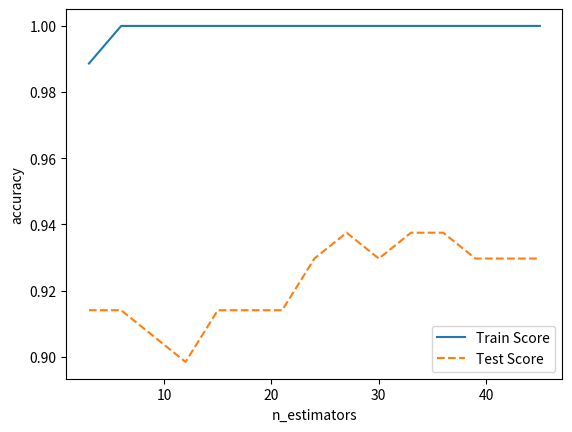

In [53]:
plt.plot(para_n_tree, train_accuracy, linestyle="-", label="Train Score")
plt.plot(para_n_tree, test_accuracy, linestyle="--", label="Test Score")
plt.xlabel("n_estimators"); plt.ylabel("accuracy")
plt.legend()

# 랜덤포레스트는 의사결정나무 모델을 계속적으로 구축해서 앙상블한 것으로 의사결정나무와 다르게 n_estimators 라는 파라미터가 하나 더 존재하고 최적값을 구하기 위해 for문을 통해 돌려주었습니다 n은 test 성능이 가장 높다고 생각되는 36번을 선정하였습니다. R에서는 디폴트값으로 300이 부여되지만 데이터 수가 너무 작기에 그냥 40번으로 하였습니다.

In [54]:
train_accuracy=[]; test_accuracy=[]
para_depth=[depth for depth in range(3,11)]

for v_max_depth in para_depth :
    rf= RandomForestClassifier(max_depth=v_max_depth, n_estimators=40,random_state=6659)
    rf.fit(x_resampled, y_resampled)
    train_accuracy.append(rf.score(x_resampled, y_resampled))
    test_accuracy.append(rf.score(df_test_x,df_test_y))

In [55]:
df_accuracy_depth= pd.DataFrame()
df_accuracy_depth["Depth"]=para_depth
df_accuracy_depth["TrainScore"]= train_accuracy
df_accuracy_depth["TestScore"]=test_accuracy
df_accuracy_depth.round(3)

,Depth,TrainScore,TestScore
0,3,0.989,0.930
1,4,0.992,0.930
2,5,0.992,0.922
3,6,1.000,0.922
4,7,1.000,0.938
5,8,1.000,0.938
6,9,1.000,0.938
7,10,1.000,0.938


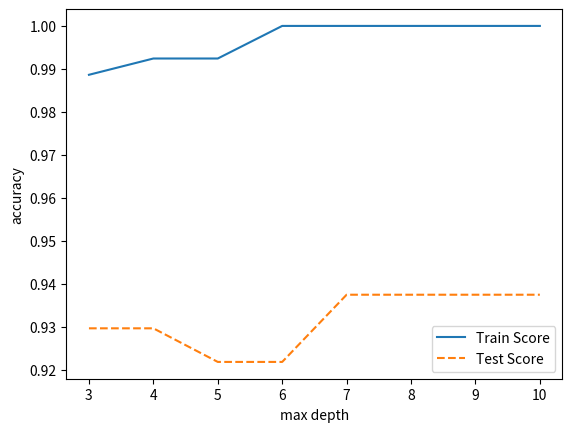

In [56]:
plt.plot(para_depth, train_accuracy, linestyle="-", label="Train Score")
plt.plot(para_depth, test_accuracy, linestyle="--", label="Test Score")
plt.xlabel("max depth"); plt.ylabel("accuracy")
plt.legend()

## max_depth를 최적값을 맞춰주기 위해 for문을 통하여 돌렸을 때 test 성능이 max_depth=7 일때 가장 높지만 데이터 수가 너무 적고 큰 차이가 없기에 5를 선정하였습니다.

In [57]:
train_accuracy=[]; test_accuracy=[]
para_split=[n_split*2 for n_split in range(1,11)]

for v_min_samples_split in para_split :
    rf= RandomForestClassifier(min_samples_split=v_min_samples_split,max_depth=5, n_estimators=40,random_state=6659)
    rf.fit(x_resampled, y_resampled)
    train_accuracy.append(rf.score(x_resampled, y_resampled))
    test_accuracy.append(rf.score(df_test_x,df_test_y))

In [58]:
df_accuracy_split= pd.DataFrame()
df_accuracy_split["MinSampleSplit"]=para_split
df_accuracy_split["TrainScore"]= train_accuracy
df_accuracy_split["TestScore"]=test_accuracy
df_accuracy_split.round(3)

,MinSampleSplit,TrainScore,TestScore
0,2,0.992,0.922
1,4,0.992,0.922
2,6,0.992,0.922
3,8,0.992,0.922
4,10,0.992,0.922
5,12,0.992,0.914
6,14,0.992,0.914
7,16,0.985,0.914
8,18,0.985,0.914
9,20,0.981,0.914


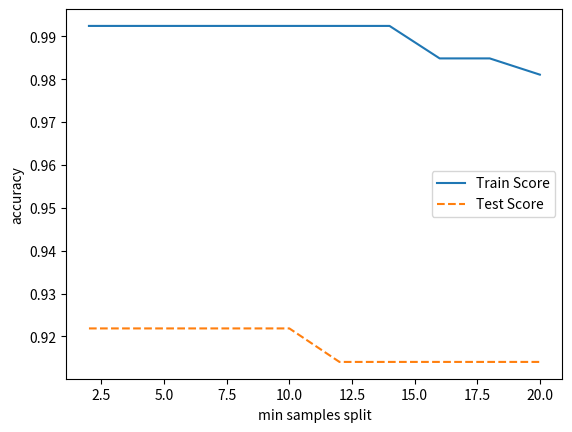

In [59]:
plt.plot(para_split, train_accuracy, linestyle="-", label="Train Score")
plt.plot(para_split, test_accuracy, linestyle="--", label="Test Score")
plt.xlabel("min samples split"); plt.ylabel("accuracy")
plt.legend()

## min_samples_split의 최적값 찾기 위해 for문 통해 돌리고 시각화 하여 보았습니다. 너무 높은 값은 과적합 위험이 있으므로 그나마 적은 10을 해주었습니다.

In [60]:
train_accuracy=[]; test_accuracy=[]
para_leaf=[leaf for leaf in range(3,11)]

for v_min_samples_leaf in para_leaf :
    rf= RandomForestClassifier(min_samples_leaf=v_min_samples_leaf,max_depth=5, n_estimators=40,min_samples_split=10,random_state=6659)
    rf.fit(x_resampled, y_resampled)
    train_accuracy.append(rf.score(x_resampled, y_resampled))
    test_accuracy.append(rf.score(df_test_x,df_test_y))

In [61]:
df_accuracy_leaf= pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"]=para_leaf
df_accuracy_leaf["TrainScore"]= train_accuracy
df_accuracy_leaf["TestScore"]=test_accuracy
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,3,0.985,0.914
1,4,0.981,0.922
2,5,0.981,0.914
3,6,0.981,0.922
4,7,0.977,0.922
5,8,0.973,0.914
6,9,0.973,0.922
7,10,0.970,0.922


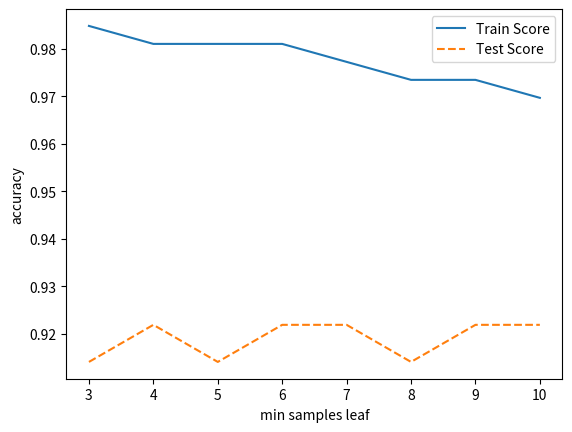

In [62]:
plt.plot(para_leaf, train_accuracy, linestyle="-", label="Train Score")
plt.plot(para_leaf, test_accuracy, linestyle="--", label="Test Score")
plt.xlabel("min samples leaf"); plt.ylabel("accuracy")
plt.legend()

## min_samples_leaf의 최적값 찾기 위해 for문 통해 돌리고 시각화 하여 보았습니다. 너무 높은 값은 과적합 위험이 있고 split보다 작은 값을 부여해야 하기에 4를 선정해주었습니다.

In [71]:
rf_final= RandomForestClassifier(min_samples_leaf=4,max_depth=5,min_samples_split=10,n_estimators=40,random_state=6659)
rf_final.fit(x_resampled, y_resampled)

RandomForestClassifier(max_depth=5, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=40, random_state=6659)

In [72]:
y_pred=rf_final.predict(df_test_x)

In [73]:
print("Accuracy on training set: {:.3f}".format(rf_final.score(x_resampled, y_resampled)))
print("Accuracy on test set: {:.3f}".format(rf_final.score(df_test_x,df_test_y)))
print("Confusion Matrix:\n{}".format(confusion_matrix(df_test_y , y_pred)))
print(classification_report(df_test_y, y_pred, digits=3))

Accuracy on training set: 0.981
Accuracy on test set: 0.922
Confusion Matrix:
[[38 10]
 [ 0 80]]
              precision    recall  f1-score   support

          양성      1.000     0.792     0.884        48
          음성      0.889     1.000     0.941        80

    accuracy                          0.922       128
   macro avg      0.944     0.896     0.912       128
weighted avg      0.931     0.922     0.920       128



## 최종 모델을 min_samples_leaf=4,max_depth=5,min_samples_split=10,n_estimators=40,random_state=6659 값을 넣고 랜덤포레스트를 돌려주었습니다. 정확도 91.4%이고 f1 스코어도 매우 높기에 높은 성능을 가졌다고 생각합니다.

In [74]:
v_feature_name= x_resampled.columns
df_importance=pd.DataFrame()
df_importance["Feature"]= v_feature_name
df_importance["importance"]= rf_final.feature_importances_

In [75]:
df_importance.sort_values("importance",ascending=False, inplace= True)
df_importance.round(3)

,Feature,importance
23,worst_area,0.158
20,worst_radius,0.129
27,worst_concave_points,0.100
26,worst_concavity,0.082
22,worst_perimeter,0.074
7,mean_concave_points,0.070
0,mean_radius,0.069
13,area_error,0.054
3,mean_area,0.045
6,mean_concavity,0.043


Text(0, 0.5, '설명변수')

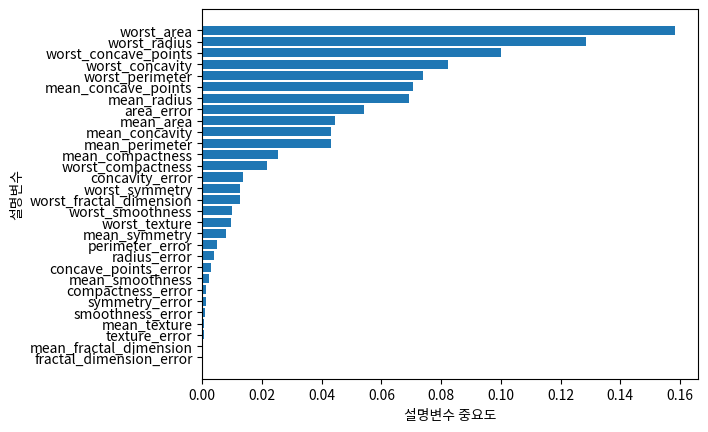

In [76]:
df_importance.sort_values("importance",ascending=True, inplace= True)
coordinates= range(len(df_importance))
plt.barh(y= coordinates, width= df_importance["importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

## 이전에 의사결정나무를 돌렸을 때와는 다르게 여러가지 변수가 설명력이 있다고 판단되었습니다. 성능과 변수 중요도를 보았을 때 의사결정나무보다 랜덤포레스트 모델이 좋다고 판단됩니다. 가장 높은 변수 중요도를 나타내는 변수는 worst_area로 이전에 의사결정나무에서 worst_perimeter와 다르게 나타났습니다. 이번 과제에서는 두 모델의 변수중요도를 비교하기 힘들었지만 만약 의사결정나무에서도 변수중요도가 여러가지로 나왔다면 공통적으로 중요하다고 판단되는 변수를 설명력 있는 변수로 판단하고, 필요에 따라 그 변수를 남겨 차원축소했을 것입니다.

In [78]:
estimator= RandomForestClassifier(n_estimators=40,random_state=6659)
param_grid={"max_depth":para_depth,"min_samples_split":para_split, "min_samples_leaf":para_leaf}

grid_dt=GridSearchCV(estimator,param_grid,scoring="accuracy", n_jobs= -1)
grid_dt.fit(x_resampled, y_resampled)

print("best estimator model: \n{}".format(grid_dt.best_estimator_))
print("\nbest parameter:\n{}".format(grid_dt.best_params_))
print("\nbest score:\n{}".format(grid_dt.best_score_.round(3)))

best estimator model: 
RandomForestClassifier(max_depth=3, min_samples_leaf=10, n_estimators=40,
                       random_state=6659)

best parameter:
{'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 2}

best score:
0.966


In [ ]:
## n_estimators만 40으로 남기고 GridSearch를 통하여 최적 파라미터를 찾아보았습니다.

In [79]:
rf_final= RandomForestClassifier(min_samples_leaf=10,max_depth=3,min_samples_split=2,n_estimators=40,random_state=6659)
rf_final.fit(df_train_x, df_train_y)

RandomForestClassifier(max_depth=3, min_samples_leaf=10, n_estimators=40,
                       random_state=6659)

In [80]:
y_pred=rf_final.predict(df_test_x)

In [81]:
print("Accuracy on training set: {:.3f}".format(rf_final.score(x_resampled, y_resampled)))
print("Accuracy on test set: {:.3f}".format(rf_final.score(df_test_x,df_test_y)))
print("Confusion Matrix:\n{}".format(confusion_matrix(df_test_y , y_pred)))
print(classification_report(df_test_y, y_pred, digits=3))

Accuracy on training set: 0.958
Accuracy on test set: 0.914
Confusion Matrix:
[[37 11]
 [ 0 80]]
              precision    recall  f1-score   support

          양성      1.000     0.771     0.871        48
          음성      0.879     1.000     0.936        80

    accuracy                          0.914       128
   macro avg      0.940     0.885     0.903       128
weighted avg      0.924     0.914     0.911       128



## 최종 모델을 min_samples_leaf=10,max_depth=3,min_samples_split=2,n_estimators=40,random_state=6659 값을 넣고 랜덤포레스트를 돌려주었습니다. 정확도 91.4%이고 f1 스코어도 매우 높기에 높은 성능을 가졌다고 생각합니다.하지만 과적합 의심도 듭니다. 실제 양성인데 예측을 음성으로 한 비율이 하나도 존재하지 않습니다 실제로 잘 예측했지만 다른 방법을 통해 확인해볼 필요가 있다고 판단됩니다.

# 2번의 GridSearch, 2번의 for문을 통한 육안으로 결정하는 파라미터 최적모델, 총 4개의 모델 모두 실제 유방암에 걸렸지만 예측의 음성으로 한 것이 1개도 없기 때문에 환자도 의사도 모두 큰 위험성은 없었다고 생각합니다. 하지만 11개의 오차로 인해 실제 음성인데도 불과하고 11명의 환자가 양성 판정을 받고, 조직검사 등을 하여 경제적 손실이 약간 발생했을 것 같습니다. 

In [82]:
v_feature_name= x_resampled.columns
df_importance=pd.DataFrame()
df_importance["Feature"]= v_feature_name
df_importance["importance"]= rf_final.feature_importances_

In [83]:
df_importance.sort_values("importance",ascending=False, inplace= True)
df_importance.round(3)

,Feature,importance
23,worst_area,0.143
20,worst_radius,0.128
27,worst_concave_points,0.107
26,worst_concavity,0.093
22,worst_perimeter,0.079
13,area_error,0.074
7,mean_concave_points,0.074
2,mean_perimeter,0.065
3,mean_area,0.041
0,mean_radius,0.040


Text(0, 0.5, '설명변수')

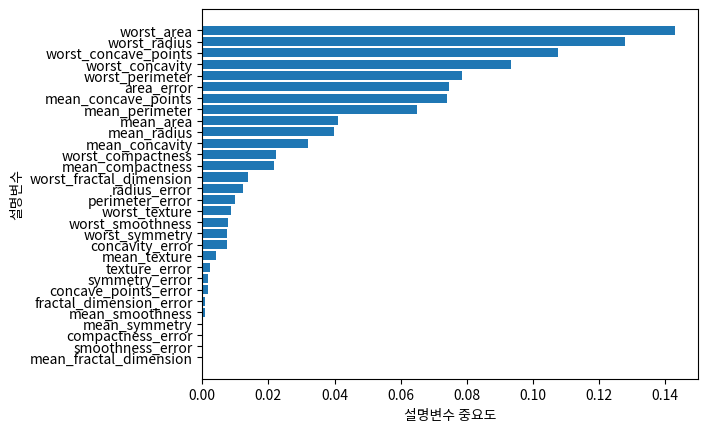

In [84]:
df_importance.sort_values("importance",ascending=True, inplace= True)
coordinates= range(len(df_importance))
plt.barh(y= coordinates, width= df_importance["importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")